<Body>   
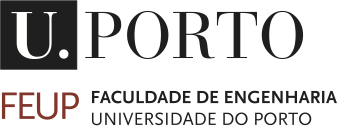   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Apr. 2022

---


# **Project #02**

**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

**Deadlines:** Present you work (and answer questions) on the week of **June 6** in your corresponding practical class. Upload the files until 23:59 of **June 16, 2022**.


---



# **Identification**

* **Group:** A4_G10
* **Name:** Thaidy Deguchi
* **Student Number:**up201802575

* **Name:**Gabriel Moura Fernandes
* **Student Number:**201806109


---




**Initial setup:** To download the data files, run the next cell.

In [ ]:
!wget -O data-setMLproject2.zip https://www.dropbox.com/s/hnyhgqlj5lcqyqr/data-setMLproject2.zip?dl=0 --quiet
!unzip data-setMLproject2.zip -d. 


Archive:  data-setMLproject2.zip
  inflating: ./data_test.csv         
  inflating: ./__MACOSX/._data_test.csv  
  inflating: ./data_test2obs.csv     
  inflating: ./__MACOSX/._data_test2obs.csv  
  inflating: ./data_train.csv        
  inflating: ./__MACOSX/._data_train.csv  


# **Main goal**

Consider the following scenario: A mobile robot aims to build a map of the environment with **semantics**, meaning that the robot should be capable to classify the objects nearby. The robot is travelling around and carries on-board a 2D LIDAR measurement device that obtains range measurements at each sample time $t=0, 0.1, 0.2, \ldots$ The following cell shows an example of the type of data:


In [ ]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)
df_test2obs.head(5)
#df

# By convention, zero values mean no range measurements.
# The units are:
# [m] for px and py (position of the robot)
# [m] for the LIDAR ranges

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,-4.00,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.98,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. If there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. Moreover, with a small probability, the range measurements could be corrupted with *outliers*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=1.0\,s$.


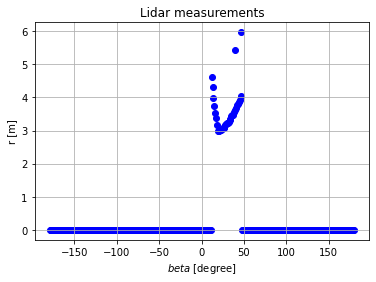

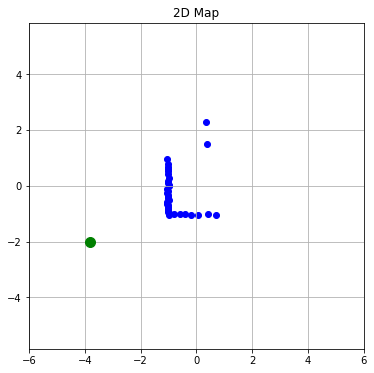

In [ ]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

t=1*10 #1sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

Note that it may be possible to have more than one object in the range of the LIDAR. \\
Here goes an example when $t=32\,s$:


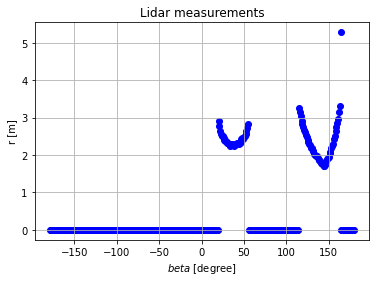

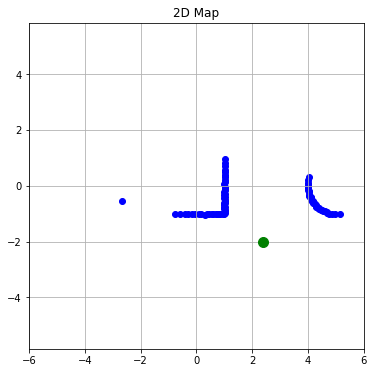

In [ ]:
t=32*10 #5sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

# **Part 1: Classification of one object**

At this point, the goal is to classify only one object that could be a square or a circle at each LIDAR snapshot. To this end, it was performed a set of 4 experiments for each obstacle (alone) where in each experiment the robot travelled during $40\,s$ with a constant speed and constant direction (horizontal line segment from left to right) from the initial position $(p_x, p_y) = (-4, \bar y)$ to the final position $(p_x, p_y) = (4, \bar y)$, where $\bar y = -4, -3, -2, -1\, m$ \\
The obstacle (circle and square) were placed at the center of the origin $(0,0)$. \\
All the experiments were combined in a unique dataset and then randomly split into two datasets: the trainning data set (70%) and the testing data set (30%). The content of each data set are displayed next.

In [ ]:
import pandas as pd
df_train = pd.read_csv('data_train.csv', index_col=0)
df_train

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.06,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.48,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.58,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.10,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.48,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.60,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2236,-2.12,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2237,-2.80,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2238,1.18,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
import pandas as pd
df_test = pd.read_csv('data_test.csv', index_col=0)
df_test

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.46,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
1,0.38,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,2.58,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,-2.84,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
4,-2.56,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,3.32,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.752938,2.789123,2.869662,2.960473,3.041882,3.292784,0.0,0.0,0.0,1.0
956,3.62,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
957,2.20,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.381054,1.557405,1.728042,2.111385,2.553902,0.000000,0.0,0.0,0.0,2.0
958,-2.98,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


Note that there is an extra column (the label column) that indicates if the obstacle is a **circle (label 1)** or a **square (label 2)**.

**1.1**
Implement a **$k$-nearest neighbor ($k$-NN)** classifier that receives the parameter $k$, the sample to classify (that are the range measurements at one snapshot), and a set of labeled training data. \\
Do not use sklearn or similar packages (use the results of notebook #7).

In [ ]:
# # To complete

X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label
#print(X_train)
#print(Y_train)
#print(data_train)
# # KNN

def vector2norm(x, data):
   npoints = data.shape[0]
   distances = np.zeros(npoints)
   for i in range(npoints) :
     res=(x-data[i][:360])**2
     dist = np.sum(res)
     distances[i] = np.sqrt(dist)
   return distances


def kNN_classifier(k,x,data):
   npoints = data.shape[0]
   # compute distance to training points
   dist = vector2norm(x,data)
   # sort along increasing distances
   ind = np.argsort(dist, axis=0)
   classes = data[:,360]
   classes_sorted = classes[ind]
   # determine class with more element in the k neighborhood
   c1 = 0
   c2 = 0
   for i in range(k):
     if classes_sorted[i]==1:
       c1 +=1
     else:
       c2 +=1
   #print("Class 1:", c1)
   #print("Class 2:", c2) 
   if c1>c2:
     return 1
   else:
     return 2



k=4
i=1120
x=X_train[i]
print("Class of x: ", Y_train[i])
print('class:',kNN_classifier(k,x,data_train))


Class of x:  2.0
class: 2


**1.2**
Test the $k$-NN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy for $k=1,3,5,7,9$ \\
Note that accuracy is defined as 
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 


In [ ]:
# # To complete

# # Let's check for all trainning data
data_train = np.append(X_train, np.reshape(Y_train, (len(Y_train), 1)), axis=1)

vizinhos=[1,3,5,7,9]
acc_train = []
acc_teste = []

for k in vizinhos:
  classification = []
  true_value=0
  false_value=0
  print("Vizinhos Treino: ", k)
  for t in range(len(X_train)):
    treino = kNN_classifier(k,X_train[t],data_train)
    classification.append(treino)
    if treino == Y_train[t]:
      true_value +=1
    else:
      false_value +=1
  class_treino = np.array(classification)
  acc_train.append(true_value / (true_value + false_value))

  c1_treino=np.count_nonzero(class_treino == 1)
  c2_treino=np.count_nonzero(class_treino == 2)


  print(c1_treino, c2_treino)

# # Let's check for the testing data

X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

for k in vizinhos:
  classification = []
  true_value=0
  false_value=0 
  print("Vizinhos Teste: ", k)
  for t in range(len(X_test)):
    teste = kNN_classifier(k,X_test[t],data_test)
    classification.append(teste)
    if teste == Y_test[t]:
      true_value +=1
    else:
      false_value +=1
  class_teste = np.array(classification)
  acc_teste.append(true_value / (true_value + false_value))

  #class_teste = np.sort(class_teste, axis=0)
  c1_teste=np.count_nonzero(class_teste == 1)
  c2_teste=np.count_nonzero(class_teste == 2)

  print(c1_teste, c2_teste)


# #printing the results
for i in range(len(vizinhos)):
  print("Numero de vizinhos: ", vizinhos[i])
  print(f"Accuracy of the train model: {100.0*acc_train[i]:4.2f}%")
  print(f"Accuracy of the tests model: {100.0*acc_teste[i]:4.2f}%")

Vizinhos Treino:  1
1120 1120
Vizinhos Treino:  3
1123 1117
Vizinhos Treino:  5
1128 1112
Vizinhos Treino:  7
1124 1116
Vizinhos Treino:  9
1121 1119
Vizinhos Teste:  1
480 480
Vizinhos Teste:  3
480 480
Vizinhos Teste:  5
482 478
Vizinhos Teste:  7
483 477
Vizinhos Teste:  9
476 484
Numero de vizinhos:  1
Accuracy of the train model: 100.00%
Accuracy of the tests model: 100.00%
Numero de vizinhos:  3
Accuracy of the train model: 99.87%
Accuracy of the tests model: 100.00%
Numero de vizinhos:  5
Accuracy of the train model: 99.64%
Accuracy of the tests model: 99.17%
Numero de vizinhos:  7
Accuracy of the train model: 99.82%
Accuracy of the tests model: 98.85%
Numero de vizinhos:  9
Accuracy of the train model: 99.78%
Accuracy of the tests model: 97.29%


**1.3**
Implement an Artificial Neural Network (ANN) of the type multi-layer perceptron (MLP) with
1. an input layer that receives the first 10 nonzero range measurements (for each snapshot);  
2. one hidden layer with 5 neurons with activation functions of the type ReLU (rectified linear unit);
3. an output layer with 1 neuron with a sigmoid activation function; 

4. a loss function of the type mean square error.

Train the ANN using the `data_train.csv` set. \\
Do not use PyTorch or similar packages (check notebook #8). \\
**Tip:** It is important to shuffle the training data. You may get better results with non constant learning rate. A final loss below 0.05 is good!


In [ ]:
# # To complete

import numpy as np
np.random.seed(42)

N_INPUTS = 10  #Number of inputs

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)
  

# # # ReLu activation function: 
def relu(x):
  return(np.maximum(0, x))

# # # Derivative of ReLu
def deriv_relu(x):
   return (x > 0) * 1





class NeuralNetwork:
  '''
  Structure of the neural network:
    - N_INPUTS inputs
    - a hidden layer with 5 neurons (h1, h2, h3, h4, h5)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
      #---------------------------
      #Biases
      #---------------------------
      self.b1, self.b2, self.b3, self.b4, self.b5 = np.random.random(5)
      #---------------------------
      self.bo = np.random.random()
      #---------------------------

      #Weights
      
      self.w1o, self.w2o, self.w3o, self.w4o, self.w5o = np.random.random(5)
      self.wi1 = np.random.random(N_INPUTS)
      self.wi2 = np.random.random(N_INPUTS)
      self.wi3 = np.random.random(N_INPUTS)
      self.wi4 = np.random.random(N_INPUTS)
      self.wi5 = np.random.random(N_INPUTS)

  def feedforward(self, x):
      '''
      - x is a numpy array with N_INPUTS elements.
      '''
      
      # # Hidden layer
      self.sum_h1 = np.dot(self.wi1, x) + self.b1
      self.sum_h2 = np.dot(self.wi2, x) + self.b2
      self.sum_h3 = np.dot(self.wi3, x) + self.b3
      self.sum_h4 = np.dot(self.wi4, x) + self.b4
      self.sum_h5 = np.dot(self.wi5, x) + self.b5
      # ...
      self.h1 = relu(self.sum_h1)
      self.h2 = relu(self.sum_h2)
      self.h3 = relu(self.sum_h3)
      self.h4 = relu(self.sum_h4)
      self.h5 = relu(self.sum_h5)
      # ...

      # # Output layer
      self.sum_o1 = self.w1o*self.h1 + self.w2o*self.h2 + self.w3o*self.h3 + self.w4o*self.h4 + self.w5o*self.h5 + self.bo
      self.o1 = sigmoid(self.sum_o1)
      return self.o1

  
  def train(self, data, y_trues, learn_rate = 0.1, epochs = 500):
      '''
      - data is a (n x N_INPUTS) numpy array, n = # of samples in the dataset.
      - y_trues is a numpy array with n elements.
        Elements in y_true correspond to those in data.
      '''
      loss_prev = 10000  #loss_prev is the loss of the previous iteration
      for epoch in range(epochs):
        for x, y_true in zip(data, y_trues):

          # *************************************************
          # 1. Feedforward Step
          y_pred = self.feedforward(x)

    #         # *************************************************
    #         # 2. Backpropagation Step

    #         # Partial derivatives.
          d_L_d_ypred = -2 * (y_true - y_pred)

    #         # Output Layer:  Neuron o1
          d_ypred_d_w1o = self.h1 * deriv_sigmoid(self.sum_o1)
          d_ypred_d_w2o = self.h2 * deriv_sigmoid(self.sum_o1)
          d_ypred_d_w3o = self.h3 * deriv_sigmoid(self.sum_o1)
          d_ypred_d_w4o = self.h4 * deriv_sigmoid(self.sum_o1)
          d_ypred_d_w5o = self.h5 * deriv_sigmoid(self.sum_o1)
    #         
          d_ypred_d_bo = deriv_sigmoid(self.sum_o1)

          d_ypred_d_h1 = self.w1o * deriv_sigmoid(self.sum_o1)
          d_ypred_d_h2 = self.w2o * deriv_sigmoid(self.sum_o1)
          d_ypred_d_h3 = self.w3o * deriv_sigmoid(self.sum_o1)
          d_ypred_d_h4 = self.w4o * deriv_sigmoid(self.sum_o1)
          d_ypred_d_h5 = self.w5o * deriv_sigmoid(self.sum_o1)
    #         

    #         # Hidden Layer: Neuron h1
          d_h1_d_wi1 = x * deriv_relu(self.sum_h1)
          d_h1_d_b1 = deriv_relu(self.sum_h1)

    #         # Hidden Layer: Neuron h2
          d_h2_d_wi2 = x * deriv_relu(self.sum_h2)
          d_h2_d_b2 = deriv_relu(self.sum_h2)

    #         # Hidden Layer: Neuron h3
          d_h3_d_wi3 = x * deriv_relu(self.sum_h3)
          d_h3_d_b3 = deriv_relu(self.sum_h3)

    #         # Hidden Layer: Neuron h4
          d_h4_d_wi4 = x * deriv_relu(self.sum_h4)
          d_h4_d_b4 = deriv_relu(self.sum_h4)

    #         # Hidden Layer: Neuron h5
          d_h5_d_wi5 = x * deriv_relu(self.sum_h5)
          d_h5_d_b5 = deriv_relu(self.sum_h5)

    #         # *************************************************
    #         # 3. Gradient Descent
    #         # Output Layer:  Neuron o1
          self.w1o -= learn_rate * d_L_d_ypred * d_ypred_d_w1o
          self.w2o -= learn_rate * d_L_d_ypred * d_ypred_d_w2o
          self.w3o -= learn_rate * d_L_d_ypred * d_ypred_d_w3o
          self.w4o -= learn_rate * d_L_d_ypred * d_ypred_d_w4o
          self.w5o -= learn_rate * d_L_d_ypred * d_ypred_d_w5o
       
          self.bo -= learn_rate * d_L_d_ypred * d_ypred_d_bo

          # Hidden Layer: Neuron h1
          self.wi1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_wi1
          self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

          # Hidden Layer: Neuron h2
          self.wi2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_wi2
          self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

          # Hidden Layer: Neuron h3
          self.wi3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_wi3
          self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_b3

          # Hidden Layer: Neuron h4
          self.wi4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_wi4
          self.b4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_b4

          # Hidden Layer: Neuron h5
          self.wi5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_wi5
          self.b5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_b5

        # *************************************************
        # 4. Performance assessment (per epoch)
        if epoch % 5 == 0:
          y_preds = np.apply_along_axis(self.feedforward, 1, data)
          loss = mse_loss(y_trues, y_preds)
          print("Epoch %d  --> Loss: %.4f" % (epoch, loss))
          # Uncomment this part to enable a nonconstant learning rate 
          if loss > loss_prev:  #if loss did not decrease, let's decrease the learn_rate
            if learn_rate > 0.002:
              learn_rate = learn_rate*.9  #decrease 90% of the previous value
              print("I'm at epoch", epoch, "with new learn_rate: ", learn_rate)
          loss_prev = loss



# # Create the ANN
model = NeuralNetwork()

# # # Build the Trainingset (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
  j=0
  for i in range(360):
    if X_train[t][i] > 0:
      if j < N_INPUTS:
        trainingset_X[t][j] = X_train[t][i]
        j +=1

# # # Trainingset: here the labels are 0 or 1
trainingset_Y = Y_train-1

# # #Shuffling the set...
from sklearn.utils import shuffle
trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

# # # Train the ANN 
model.train(trainingset_X, trainingset_Y, learn_rate = 0.1, epochs = 300)

Epoch 0  --> Loss: 0.4999
Epoch 5  --> Loss: 0.2116
Epoch 10  --> Loss: 0.1859
Epoch 15  --> Loss: 0.1925
I'm at epoch 15 with new learn_rate:  0.09000000000000001
Epoch 20  --> Loss: 0.1873
Epoch 25  --> Loss: 0.1733
Epoch 30  --> Loss: 0.1711
Epoch 35  --> Loss: 0.1866
I'm at epoch 35 with new learn_rate:  0.08100000000000002
Epoch 40  --> Loss: 0.1702
Epoch 45  --> Loss: 0.1711
I'm at epoch 45 with new learn_rate:  0.07290000000000002
Epoch 50  --> Loss: 0.1647
Epoch 55  --> Loss: 0.1650
I'm at epoch 55 with new learn_rate:  0.06561000000000002
Epoch 60  --> Loss: 0.1618
Epoch 65  --> Loss: 0.1599
Epoch 70  --> Loss: 0.1593
Epoch 75  --> Loss: 0.1579
Epoch 80  --> Loss: 0.1567
Epoch 85  --> Loss: 0.1558
Epoch 90  --> Loss: 0.1547
Epoch 95  --> Loss: 0.1536
Epoch 100  --> Loss: 0.1522
Epoch 105  --> Loss: 0.1510
Epoch 110  --> Loss: 0.1493
Epoch 115  --> Loss: 0.1477
Epoch 120  --> Loss: 0.1469
Epoch 125  --> Loss: 0.1450
Epoch 130  --> Loss: 0.1399
Epoch 135  --> Loss: 0.1391
Epoch 

**1.4**
Test the ANN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy. Write (in a brief sentence) the main conclusions about the classifiers (k-NN and ANN) until this point.

In [ ]:
# To complete

# #Evaluation with the Training set
classification = []
cont1 = 0
cont2 = 0
error_clas = 0

for t in range(len(Y_train)):
  classification.append( model.feedforward(trainingset_X[t]) )
classification = np.array(classification)


error_clas = 0
for t in range(len(classification)):
  if (classification[t] >= 0.5) and (trainingset_Y[t] == 1):
    cont1 +=1
  if (classification[t] < 0.5) and (trainingset_Y[t] == 0):
    cont2 +=1
  if ((classification[t] >= 0.5) and (trainingset_Y[t] == 0)) or ((classification[t] < 0.5) and (trainingset_Y[t] == 1)):
    error_clas +=1

print(cont1)  
print("Number of misclassified samples in the training data: ", error_clas, "in", len(Y_train))
acc = (cont1+cont2)/(cont1+cont2+error_clas)
print(f"Accuracy of the model: {100.0*acc:4.2f}%")



######################################################################################################################################################



# # Evaluation with Test_set
test_set_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
  j=0
  for i in range(360):
    if X_test[t][i] > 0:
      if j < N_INPUTS:
        test_set_X[t][j] = X_test[t][i]
        j +=1
        
test_set_Y = Y_test-1

classification = []
cont1 = 0
cont2 = 0
error_clas = 0
for t in range(len(Y_test)):
  classification.append( model.feedforward(test_set_X[t]) )
classification = np.array(classification)

error_clas = 0
for t in range(len(classification)):
  if (classification[t] >= 0.5) and (test_set_Y[t] == 1):
    cont1 +=1                                                                                                                     ## True Positive
  if (classification[t] < 0.5) and (test_set_Y[t] == 0):
    cont2 +=1                                                                                                                     ## True Negative
  if ((classification[t] >= 0.5) and (test_set_Y[t] == 0)) or ((classification[t] < 0.5) and (test_set_Y[t] == 1)):
    error_clas +=1                                                                                                                ## False Negative and Positive

print(cont1)  
print("Number of misclassified samples in the test data: ", error_clas, "in", len(Y_test))
acc = (cont1+cont2)/(cont1+cont2+error_clas)
print(f"Accuracy of the model: {100.0*acc:4.2f}%")


1101
Number of misclassified samples in the training data:  116 in 2240
Accuracy of the model: 94.82%
476
Number of misclassified samples in the test data:  51 in 960
Accuracy of the model: 94.69%


# **Part 2: Classification of two objects**

We would like now to use the previous ANN classifier to the data in `data_test2obs.csv` that may have two objects at the same snapshot. The idea is to before send the range measurements to the classifier, apply first a k-means at each snapshot to separate the data into two sub-sets such that each sub-set only contains data of one object. Then, send each subset of data to the ANN classifier.

**2.1**
Implement the k-means algorithm and test it for two snapshots **converted to the 2D map** (that is, the input data for the k-means is the 2D map) of the dataset `data_test2obs.csv` for 
1. $t=1\,s$ (which has only one object) and 
2. for $t=32\,s$ (which has 2 objects). 

What can you conclude? \\
Do not use sklearn or similar packages (use the results of notebook #10).


Number of iterations 2


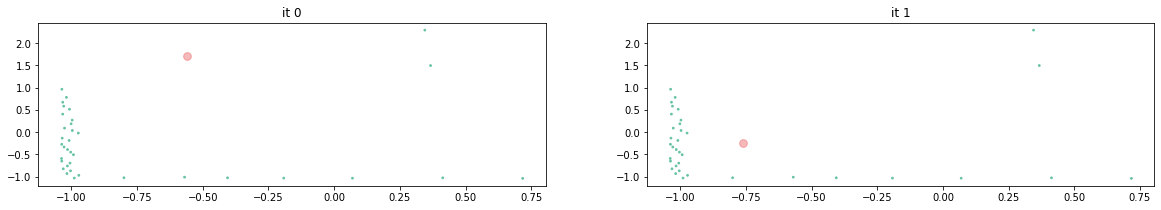

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[-0.76204358 -0.23716139]]
Number of iterations 3


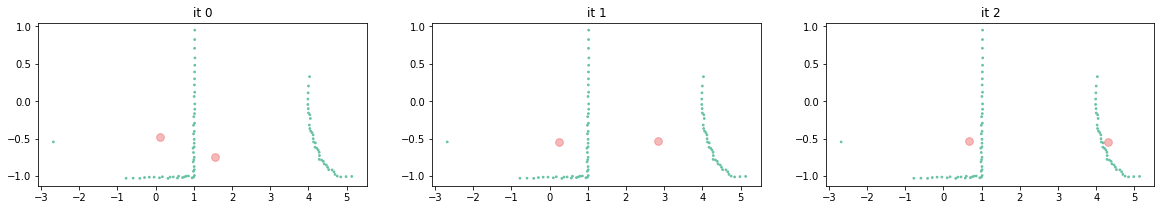

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.66086106 -0.5256377 ]
 [ 4.29656486 -0.54539163]]


In [ ]:
# To complete

def kmeans_func(X_func, K_func, show_plot, ini_method=0):
  '''
    X_func are sample points; 
    K_func is the number of clusters;
    showplot 0/1 - not / show centroid evolution over iterations;
    ini_method 0/1 - ini centroids 0=> with random within data bounderies or 1=>from the initial points (risky!)
  '''
  cluster = np.zeros(X_func.shape[0],dtype=int)
  centr_ini = []
  if ini_method:  # 1 is points, 0 is random
    # Initial centroids are sample points (risky!)
    for i in range(K_func):
      centr_ini.append(X_func[i])
  else:
    # Non absurd Random Initial Centroids
    max0 = max(X_func[:,0]);
    min0 = min(X_func[:,0]);
    max1 = max(X_func[:,1]);
    min1 = min(X_func[:,1]);

    for i in range(K_func):
      centr_ini.append([random.uniform(min0,max0),random.uniform(min1,max1)])

  iter = 0
  diff = 1
  centroids = centr_ini
  centr_list = [centroids]

  while diff:
    # for each sample
    for sample_i, sample_pt in enumerate(X_func):
      min_dist = float('inf')
      # dist of the point from all centroids
      for centroid_i, centroid in enumerate(centroids):
        dist = np.sqrt((centroid[0]-sample_pt[0])**2 + (centroid[1]-sample_pt[1])**2)
        if min_dist > dist:
          min_dist = dist
          cluster[sample_i] = centroid_i

    sum = np.zeros((K_func,2))
    cnt = np.zeros(K_func)
    for sample_i, sample_pt in enumerate(X_func):
      sum[cluster[sample_i]] += X_func[sample_i]
      cnt[cluster[sample_i]] += 1
    new_centroids = np.zeros((K_func,2))
    for k in range(K_func):
      if (cnt[k]>0):
        new_centroids[k] = sum[k] / cnt[k]
      else:
        # hopefully, the next iteration will fix uninteresting centroid
        new_centroids[k] = [random.uniform(min0,max0),random.uniform(min1,max1)] 



    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
      centr_list.append(new_centroids)
    iter = iter+1

  print("Number of iterations", iter)
  #print(centr_list)

  if show_plot: # pretty subplotting
    cols = min(iter,6) # max 6 plots
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20,3))
    for col in range(min(cols,iter)):
      ax[col].scatter(X_func[:, 0], X_func[:, 1], s=3, c=np.zeros(X_func.shape[0]), cmap='Set2')
      i = round(iter/cols*col)
      if (col==cols-1):
        i = iter-1
      ## print("centr %s", i,"=>", centr_list[i])
      ## devia funcionar ### ax[row, col].scatter(centr_list[i][:,0], centr_list[i][:,1], c='black', s=200, alpha=0.5);
      for j in range(K_func):
        centr_plot_x = centr_list[i][j][0]
        centr_plot_y = centr_list[i][j][1]
        ax[col].scatter(centr_plot_x, centr_plot_y, c=j, s=60, alpha=0.3, cmap='Set1')
        ax[col].title.set_text("it " + str(i) )
    plt.show()

  return centroids, cluster

j=2;
while j>0:
  #Build the cloud points in 2D map
  x_o, y_o = [], []
  if(j==2):
    t=1*10
    K=1
  else:
    t=32*10
    K=2
   
  for i in range(len(Lidar_range[t])):
    if Lidar_range[t][i] > 0:
      x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
      y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

  X = np.array([x_o, y_o]).T
  centr, clust = kmeans_func(X, K, show_plot=1, ini_method=0)
  print(clust)
  print(centr)
  j = j-1

**2.2**
Using the previous results, 
1. implement a method to automatically identify for each snapshot if it has 1 or 2 objects;
2. build a new test set with all the data in `data_test2obs.csv`, but now the new test set only has 1 object in each snapshot (and therefore this data set has more lines);
3. test this new data set using the ANN classifier.

Plot the position of the robot and the classified objects for some snapshots. What are the main conclusions?

In [ ]:
# # To complete

Threshold = -20 # to decide if k=1 or k=2,

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

def SSE(X, centroids, cluster): 
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[cluster[i], 0]-val[0])**2 +(centroids[cluster[i], 1]-val[1])**2) 
  return sum

# Building the data set for ANN testing using k-means to split objects 

test_set_X = np.array([])
classification = []
##############################################################################################################################


for t in range(len(Lidar_range)):

  x_o, y_o = [], []

  for i in range(len(Lidar_range[t])):
    if Lidar_range[t][i] > 0:
      x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
      y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

  X = np.array([x_o, y_o]).T
  cost_list = []
  k_range = range(1, 3)

  for k in k_range:
    centr, clust = kmeans_func(X, k, show_plot=0, ini_method=0)
    # Calculate SSE
    cost = SSE(X, centr, clust)
    cost_list.append(cost)
    #plt.scatter(X[:, 0], X[:, 1], c=clust, s=3, cmap='Set1')
    #plt.scatter(centr[:, 0], centr[:, 1], c='b', s=200, alpha=0.5);
    #print(cost_list)


  der_list = []
  der_range = range(1, max(k_range))

  for i in der_range:
    der_list.append( cost_list[i]-cost_list[i-1] )


  # Two very simple algorithms to select K

  for i in reversed(der_range):
    if der_list[i-1] < Threshold:
      bestK = i+1
      break
    else:
      bestK = 1
  print("A simple approach (%d) reveals that a good K is %d" %(t,bestK))

  ################################################################################################################################################
  #Let's now decide if this snapshot has 1 or 2 obstacles
  if bestK == 2:

    #2 objects
    X_feature1, X_feature2 = np.zeros([N_INPUTS]), np.zeros([N_INPUTS])
    j1,j2=0,0
    for i in range(len(x_o)):
      if j1 < N_INPUTS:
        if clust[i] == 0:
          X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
          j1=j1+1
      if j2 < N_INPUTS:
        if clust[i] == 1:
          X_feature2[j2]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
          j2=j2+1
    if len(test_set_X) == 0:
      test_set_X = np.array([X_feature1, X_feature2])
    else:
      test_set_X = np.concatenate((test_set_X,np.array([X_feature1, X_feature2])))

########################################################################################################################

  else: #only one object

    X_feature1 = np.zeros([N_INPUTS])
    j1=0
    for i in range(len(x_o)):
      if j1 < N_INPUTS:
        if clust[i] == 0:
          X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
          j1=j1+1
    if len(test_set_X) == 0:
      test_set_X = np.array([X_feature1])
    else:
      test_set_X = np.concatenate((test_set_X,np.array([X_feature1])))

######################################################################################################################

for b in range(len(test_set_X)):
  classification.append(model.feedforward(test_set_X[b]))
classification = np.array(classification)

#print(classification)

for t in range(len(classification)):
  if ((classification[t] >= 0.5)):
    classification[t] = 1
  if ((classification[t] < 0.5)): 
    classification[t] = 0

test_set_Y = classification


Number of iterations 2
Number of iterations 6
A simple approach (0) reveals that a good K is 1
Number of iterations 2
Number of iterations 11
A simple approach (1) reveals that a good K is 1
Number of iterations 2
Number of iterations 10
A simple approach (2) reveals that a good K is 1
Number of iterations 2
Number of iterations 5
A simple approach (3) reveals that a good K is 1
Number of iterations 2
Number of iterations 6
A simple approach (4) reveals that a good K is 1
Number of iterations 2
Number of iterations 4
A simple approach (5) reveals that a good K is 1
Number of iterations 2
Number of iterations 11
A simple approach (6) reveals that a good K is 1
Number of iterations 2
Number of iterations 8
A simple approach (7) reveals that a good K is 1
Number of iterations 2
Number of iterations 9
A simple approach (8) reveals that a good K is 1
Number of iterations 2
Number of iterations 5
A simple approach (9) reveals that a good K is 1
Number of iterations 2
Number of iterations 2
A

**2.3 (Extra)** 
Using now PyTorch (or other similar package), implement a deep ANN (meaning with more layers and probably with better accuracy) and test it.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete

import os
import torch
import torch.nn as nn
import torch.utils.data as data
SEED = 1234
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
N_INPUTS = 10


####################################################################################################################################
####################################################################################################################################
####################################################################################################################################

class PyTorchNN(nn.Module):
    
    def __init__(self, num_inputs, num_hidden1, num_hidden2, num_outputs):
        super().__init__()

        # Initialize the modules we need to build the network
        self.linear1         = nn.Linear(num_inputs, num_hidden1)
        self.activation_f1   = nn.Tanh()
        self.linear2         = nn.Linear(num_hidden1, num_hidden2)
        self.activation_f2   = nn.Tanh()
        self.linear3         = nn.Linear(num_hidden2, num_outputs)
        self.activation_sig  = nn.Sigmoid()          
    
    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.activation_f1(x)
        x = self.linear2(x)
        x = self.activation_f2(x)
        x = self.linear3(x)
        x = self.activation_sig(x)                  
        return x


####################################################################################################################################
####################################################################################################################################
####################################################################################################################################

class Dataset(data.Dataset):

    def __init__(self, size, data, label):

        super().__init__()
        self.size = size
        self.generate_data(data, label)

    def generate_data(self, data, label):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        
        try: 
          if data == 0:
            data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
            label = (data.sum(dim=1) == 1).to(torch.long)
            data += torch.randn(data.shape)

            self.data = data
            self.label = label

        except:
          self.data = data
          self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label


####################################################################################################################################
####################################################################################################################################
####################################################################################################################################

model = PyTorchNN(num_inputs = N_INPUTS, num_hidden1=5, num_hidden2=5, num_outputs=1)

####################################################################################################################################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on:", device, "device")

# Convert model parameters and buffers to CPU or CUDA
model.to(device)

####################################################################################################################################


X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values


trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
  j=0
  for i in range(360):
    if X_train[t][i] > 0:
      if j < N_INPUTS:
        trainingset_X[t][j] = X_train[t][i]
        j +=1

# # # Trainingset: here the labels are 0 or 1
trainingset_Y = Y_train-1


dataset_treino_x =torch.tensor(trainingset_X, dtype=torch.float32)
dataset_treino_y =torch.tensor(trainingset_Y.T, dtype=torch.long)


dataset = Dataset(len(trainingset_X), 0, 0)
dataset_treino = Dataset(len(trainingset_X), dataset_treino_x, dataset_treino_y)


####################################################################################################################################

import torch.utils.data as data
data_loader = data.DataLoader(dataset, batch_size= 1, shuffle=True)
train_data_loader = data.DataLoader(dataset_treino, batch_size = 8, shuffle=True)

####################################################################################################################################


from tqdm.notebook import tqdm

def train_model(model, optimizer, dataloader, loss_criteria, num_epochs):
    # Set model to train mode
    model.train()


    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0

        for data_inputs, data_labels in dataloader:
          
          ## Step 0 (needed in case of GPU): Move input data to device 
          data_inputs = data_inputs.to(device)
          data_labels = data_labels.to(device)

          # Step 1: setting gradients to zero. The gradients would not be overwritten but actually added to the existing ones.
          optimizer.zero_grad() 
          
          ## Step 2: Run the model on the input data
          preds = model(data_inputs)
          preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
          
          ## Step 3: Calculate the loss
          loss = loss_criteria(preds, data_labels.float())
          
          ## Step 4: Perform backpropagation
          loss.backward()
          
          ## Step 5: Update parameters based on the calculated gradients
          optimizer.step()

          ## Step 6: Take the running average of the loss
          epoch_loss += loss.item()
            
        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)

        if epoch % 5 == 0:    
            print('[%d] loss: %.3f' % (epoch + 1, epoch_loss))
            

    return

learn_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

loss_criteria = nn.MSELoss()
train_model(model, optimizer, train_data_loader, loss_criteria, 200)


####################################################################################################################################
####################################################################################################################################

# Evaluation with Test_set
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

test_set_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
  j=0
  for i in range(360):
    if X_test[t][i] > 0:
      if j < N_INPUTS:
        test_set_X[t][j] = X_test[t][i]
        j +=1
        
test_set_Y = Y_test-1


dataset_teste_x =torch.tensor(test_set_X, dtype=torch.float32)
dataset_teste_y =torch.tensor(test_set_Y.T, dtype=torch.long)

dataset_teste = Dataset(len(test_set_X), dataset_teste_x, dataset_teste_y)


####################################################################################################################################


test_data_loader = data.DataLoader(dataset_teste, batch_size = 128, shuffle=False, drop_last=True) 


####################################################################################################################################


def eval_model(model, data_loader):
    # Set model to eval mode
    model.eval() 

    true_preds, num_preds = 0., 0.
    
    # Deactivate gradients for the following code
    with torch.no_grad(): 

        # get batch of images from the test DataLoader
        for data_inputs, data_labels in data_loader:
            ## Step 0 (needed in case of GPU): Move input data to device
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

            # Step 1: determine prediction of model
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]
            #preds = torch.sigmoid(preds)  # UNCOMMNET if nn.BCEWithLogitsLoss is selected.  Sigmoid to map predictions between 0 and 1. Be aware that the l

            # Step 2: Binarize predictions to 0 and 1
            pred_labels = (preds >= 0.5).long() 
            
            # Step 3: Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
       
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

eval_model(model, test_data_loader)





The model will be running on: cuda:0 device


  0%|          | 0/200 [00:00<?, ?it/s]

[1] loss: 0.031
[6] loss: 0.028
[11] loss: 0.026
[16] loss: 0.025
[21] loss: 0.024
[26] loss: 0.023
[31] loss: 0.024
[36] loss: 0.024
[41] loss: 0.022
[46] loss: 0.022
[51] loss: 0.021
[56] loss: 0.020
[61] loss: 0.019
[66] loss: 0.020
[71] loss: 0.018
[76] loss: 0.021
[81] loss: 0.017
[86] loss: 0.016
[91] loss: 0.016
[96] loss: 0.017
[101] loss: 0.016
[106] loss: 0.016
[111] loss: 0.016
[116] loss: 0.016
[121] loss: 0.015
[126] loss: 0.014
[131] loss: 0.016
[136] loss: 0.014
[141] loss: 0.014
[146] loss: 0.014
[151] loss: 0.014
[156] loss: 0.014
[161] loss: 0.012
[166] loss: 0.013
[171] loss: 0.012
[176] loss: 0.012
[181] loss: 0.013
[186] loss: 0.012
[191] loss: 0.012
[196] loss: 0.013
Accuracy of the model: 93.19%


In [ ]:
!jupyter nbconvert --to html /content/ML_project2_final.ipynb

[NbConvertApp] Converting notebook /content/ML_project2_final.ipynb to html
[NbConvertApp] Writing 641170 bytes to /content/ML_project2_final.html
